In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)  #모든 행이 보여지도록
pd.set_option('display.max_columns',None)  #모든 열이 보여지도록

In [2]:
df = pd.read_csv("blue_text_0811_13000s.csv",encoding = 'ansi')
df.Date = pd.to_datetime(df.Date)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78851 entries, 0 to 78850
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Num      78851 non-null  int64         
 1   Class    78851 non-null  object        
 2   Title    78851 non-null  object        
 3   Date     78851 non-null  datetime64[ns]
 4   Support  78851 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [4]:
df.head()

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626
1,454160,안전/환경,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-04-19,2026252
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597
4,454157,정치개혁,문재인 대통령 탄핵을 촉구합니다.,2020-03-05,1469023


## 키워드 변경 함수

In [5]:
def rep_keyword(before, after):
    ind = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].index
    df.iloc[ind,2] = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].str.replace(before,after,case = False)

In [6]:
rep_keyword("n번방","엔번방")
rep_keyword("N번방","엔번방")

In [7]:
# ind = df.loc[df['Title'].str.contains('n번방')].loc[:,"Title"].index
# df.iloc[ind,2] = df.loc[df['Title'].str.contains('n번방')].loc[:,"Title"].str.replace("n번방","엔번방",case = False)

# ind = df.loc[df['Title'].str.contains('N번방')].loc[:,"Title"].index
# df.iloc[ind,2] = df.loc[df['Title'].str.contains('N번방')].loc[:,"Title"].str.replace("N번방","엔번방",case = False)

## 워드 클라우드 생성 함수

In [8]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [9]:
def word_cloud(year, cla, sup=0):
    if year == 0:
        temp = df
    else:
        temp = df[df.Date.dt.year == year]
        
    if cla == "전체":
        temp = temp
    else:
        temp = temp[temp.Class == cla]
    
    
    temp = temp[temp.Support >= sup]
    co = temp.Title.count()
    print("{}년 {}분야 동의수 {}건 이상 받은 {}건의 청원들의 다빈출 단어 및 워드 클라우드".format(year,cla, sup, co))
    print()
    
    #     ### 세종사전 실행
    #     from konlpy.tag import Twitter
    #     from collections import Counter
    #     from wordcloud import WordCloud
    twitter = Twitter()
    
    ### 단어리스트 만들기
    word_list = []
    word_list = temp["Title"]
    
    ### 형태소 분리
    sentences_tag = []

    for sentence in word_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    
    ### 명사만 추출
    noun_list = []
    for sentence in sentences_tag:
        for word, tag in sentence:
            if tag in ['Noun']:
                noun_list.append(word)
                
    ### 두 단어 이상만 추출
    len(noun_list)

    noun_list = [n for n in noun_list if len(n) > 1]
    noun_list[:100]
    
    ### 불용어 제거
    stopwords = ["청원", '대한', '요청', '국민', '촉구', '요구', '불법', '대한민국', '개선', '관련' ,'한국']


    noun_list = [i for i in noun_list if i not in stopwords]
    
    ### 단어 카운트
    counts = Counter(noun_list)
    tags = counts.most_common(40)
    tags
    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    #print(tags)
    df_tag = pd.DataFrame(data = tags)
    display(df_tag[:20].T)
    display(df_tag[20:].T)
    print()
    
    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [10]:
class_name = df.Class.unique()
class_name

array(['안전/환경', '정치개혁', '기타', '인권/성평등', '보건복지', '외교/통일/국방', '교통/건축/국토',
       '미래', '문화/예술/체육/언론', '육아/교육', '행정', '일자리', '반려동물', '성장동력', '경제민주화',
       '농산어촌', '저출산/고령화대책'], dtype=object)

### - word_cloud(년도, 분야, 몇 건 이상의 동의?)
### - 년도 부분 0(전체), 2017, 2018, 2019, 2020, 2021년도 입력 가능
### - 분야 부분 위에 나와 있는 리스트 열 입력 가능 + "전체"
### - ex) word_cloud(2019,"정치개혁",30000) => 2019년에 "정치개혁" 분야 3만 이상의 청원에서의 워드클라우드와 빈도수 출력

0년 인권/성평등분야 동의수 200000건 이상 받은 63건의 청원들의 다빈출 단어 및 워드 클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,처벌,사건,여성,수사,보호,폭행,가해자,반대,엔번방,강간,성폭행,조사,성범죄,학교,강제,판사,청소년,폐지,강력,피해자
1,14,12,7,7,5,5,5,4,4,4,4,4,4,4,3,3,3,3,3,3


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,성폭력,의무,신천지,서울,자격,박탈,성별,남성,이유,미성년,고발,고통,촬영,혐의,특별,시오,판매,금지,조두순,사망
1,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


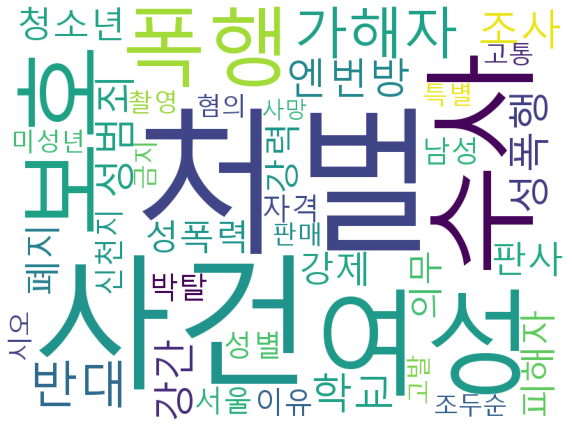

In [20]:
word_cloud(0,"인권/성평등",200000)

In [12]:
df[df.Support>=200000]

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 엔번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626
1,454160,안전/환경,텔레그램 엔번방 가입자 전원의 신상공개를 원합니다,2020-04-19,2026252
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597
4,454157,정치개혁,문재인 대통령 탄핵을 촉구합니다.,2020-03-05,1469023
5,454156,인권/성평등,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",2020-03-23,1449521
6,454155,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018-11-16,1192049
7,454154,기타,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-05-02,1007040
8,454153,보건복지,중국인 입국 금지 요청,2020-02-22,761833
9,454152,정치개혁,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!,2019-09-20,757730


0년 정치개혁분야 동의수 200000건 이상 받은 36건의 청원들의 다빈출 단어 및 워드 클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,탄핵,장관,국회의원,대통령,윤석열,추미애,해임,문재인,법무부,처벌,수사,판사,인상,정당,해산,청와대,조국,검사,재판,검찰총장
1,6,6,5,4,4,4,4,3,3,3,3,3,3,2,2,2,2,2,2,2


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,법무,반대,사이트,정부,전원,위법,조사,자유,후보자,임명,반드시,기밀,누설,범한,총장,커밍아웃,사표,정경,임정엽,권성수
1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1


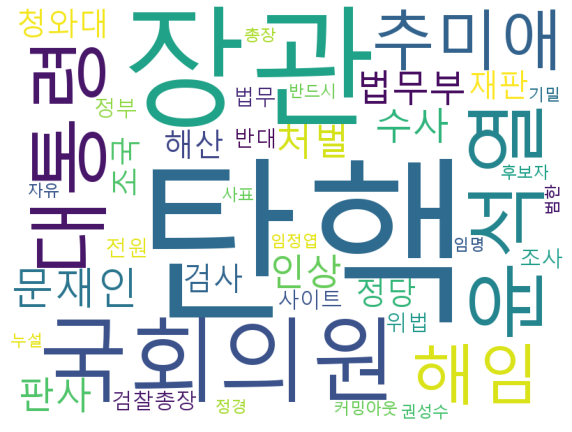

In [13]:
word_cloud(0,"정치개혁", 200000)

2019년 보건복지분야 동의수 0건 이상 받은 867건의 청원들의 다빈출 단어 및 워드 클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,보험,병원,의료,환자,건강,치료,반대,지원,적용,장애인,국가,간호조무사,영리병원,간호사,미세먼지,고발,처벌,가족,제발,복지
1,69,67,64,50,46,46,46,44,37,35,30,27,25,24,23,22,21,21,20,20


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,생리대,국민연금,정부,아이,혜택,사고,폐지,제주도,의료사,활동,제도,의사,센터,개정,허가,사건,그랜드캐년,조사,청년,급여
1,20,20,19,19,19,19,19,19,18,18,18,17,17,17,17,16,16,15,15,14


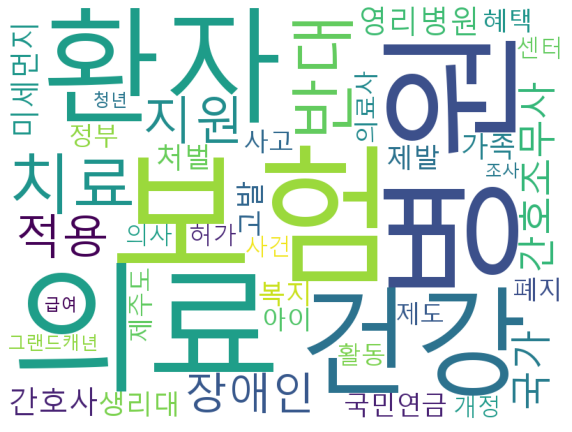

In [14]:
word_cloud(2019,"보건복지")

2021년 교통/건축/국토분야 동의수 0건 이상 받은 606건의 청원들의 다빈출 단어 및 워드 클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,주택,아파트,지역,분양,신도시,임대,부동산,건설,투기,노선,반대,대통령,정책,정부,서울,공사,국가,철회,시오,김포
1,78,42,39,39,34,33,33,28,26,24,21,20,19,18,17,17,16,15,15,15


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,연장,피해,조정,재건축,조사,고발,구역,개정,재개발,계획,철도,사업,도로,주민,제도,사기,마을,규제,폐지,국토부
1,15,15,15,15,15,15,15,14,14,13,13,13,13,13,13,13,12,12,11,11


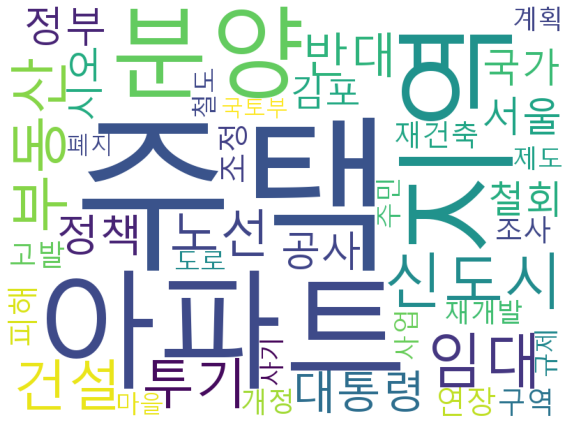

In [15]:
word_cloud(2021,"교통/건축/국토")

2021년 인권/성평등분야 동의수 200000건 이상 받은 10건의 청원들의 다빈출 단어 및 워드 클라우드



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,처벌,여성,한강,실종,대학생,연예인,고통,영상,페이크,모텔,감금,성폭행,남성,엄벌,안양,택시,기사,폭행,가해자,강력
1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,대가,강간,남초,커뮤니티,음지,소라넷,성범죄,고발,초소,카메라,판매,금지,청소노동자,화장실,식사,휴게,공간,보장,의무,학교
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


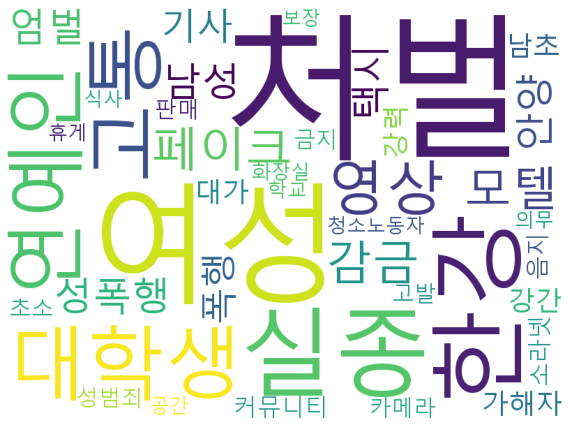

In [16]:
word_cloud(2021,"인권/성평등",200000)